## イネの病気を判別するためのモデル(Model which clasifies the disease of rice plant)
The model classfies the diseases of rice plant. Diseases includes "rice blast" and "stripes".
When this program run, artificial intelligence classfies the disease in Flask that is right framework made by python.
It depends on images that AI classfies diseases. So, if students would make the model, they must collect clear images about the diseases.

In [0]:
from keras.applications.inception_v3  import InceptionV3
from keras.applications.inception_v3 import preprocess_input
from keras.models import Sequential, Model
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D, ZeroPadding2D, GlobalAveragePooling2D, AveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint, CSVLogger, LearningRateScheduler, ReduceLROnPlateau
from keras.optimizers import SGD
from keras import optimizers
from keras.regularizers import l2
import matplotlib.image as mpimg
from scipy.misc import imresize
from keras.callbacks import EarlyStopping 
import numpy as np
import keras.backend as K
import math

In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
## Google Drive内のデータを確認
!ls ./gdrive/'My Drive'/"Colab Notebooks"

class.ipynb			riceplantordog.ipynb  validation
model				saver		      ver
model_classfies_diseases.ipynb	train		      verificate.ipynb
rice-plant-man.ipynb		Untitled0.ipynb


In [0]:
## 多値分類のコードを追加していく

### 元モデルをinceptionV3にセット
base_model = InceptionV3(weights='imagenet', include_top=False)
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation="relu")(x)
x = Dropout(0.5)(x)
x = Dense(256, activation="relu")(x)
predictions = Dense(3, activation="sigmoid")(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in model.layers[:249]:
   layer.trainable = False
for layer in model.layers[249:]:
   layer.trainable = True

model.compile(loss = "categorical_crossentropy", optimizer = optimizers.SGD(lr=0.0001, momentum=0.9), metrics=["accuracy"])

In [21]:
test_datagen = ImageDataGenerator(rescale=1.0 / 255)


### 学習用のデータをかさ増し
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    horizontal_flip = True,
    fill_mode = "nearest",
    zoom_range = 0.3,
    width_shift_range = 0.3,
    height_shift_range=0.3,
    rotation_range=90)
train_generator = train_datagen.flow_from_directory(
    './gdrive/My Drive/Colab Notebooks/train',
    target_size = (256, 256), ## デフォルト
    batch_size = 32,
    class_mode = "categorical") ## 多値分類なのでcategoricalに設定

Found 92 images belonging to 3 classes.


In [22]:
## 学習用データの水増し
validation_generator = test_datagen.flow_from_directory(
    './gdrive/My Drive/Colab Notebooks/validation/',
    target_size=(256, 256),
    batch_size=32,
    class_mode='categorical')

Found 48 images belonging to 3 classes.


In [23]:
print(train_generator.class_indices)

{'goma': 0, 'imoti': 1, 'shima': 2}


In [24]:
checkpoint = ModelCheckpoint("./gdrive/My Drive/Colab Notebooks/saver/sep_{epoch:02d}.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
early = EarlyStopping(monitor='val_acc', min_delta=0, patience=10, verbose=1, mode='auto')

kk = model.fit_generator(train_generator, 
                   steps_per_epoch=2000, 
                   epochs=10, 
                   verbose=1, 
                   callbacks=[checkpoint, early], 
                   validation_data=validation_generator, 
                   validation_steps=800, 
                   class_weight=None, 
                   max_queue_size=10, 
                   workers=1, 
                   use_multiprocessing=False, 
                   shuffle=True,
                   initial_epoch=0)

Epoch 1/10
2000/2000 [==============================] - 2237s 1s/step - loss: 0.6556 - acc: 0.7393 - val_loss: 1.0722 - val_acc: 0.6042

Epoch 00001: val_acc improved from -inf to 0.60417, saving model to ./gdrive/My Drive/Colab Notebooks/saver/sep_01.h5
Epoch 2/10
2000/2000 [==============================] - 2233s 1s/step - loss: 0.1702 - acc: 0.9418 - val_loss: 1.2571 - val_acc: 0.6458

Epoch 00002: val_acc improved from 0.60417 to 0.64583, saving model to ./gdrive/My Drive/Colab Notebooks/saver/sep_02.h5
Epoch 3/10
2000/2000 [==============================] - 2243s 1s/step - loss: 0.1025 - acc: 0.9629 - val_loss: 1.2915 - val_acc: 0.6667

Epoch 00003: val_acc improved from 0.64583 to 0.66667, saving model to ./gdrive/My Drive/Colab Notebooks/saver/sep_03.h5
Epoch 4/10
2000/2000 [==============================] - 2236s 1s/step - loss: 0.0811 - acc: 0.9673 - val_loss: 1.3838 - val_acc: 0.6667

Epoch 00004: val_acc did not improve from 0.66667
Epoch 5/10
2000/2000 [====================

In [0]:
from matplotlib import pyplot as plt

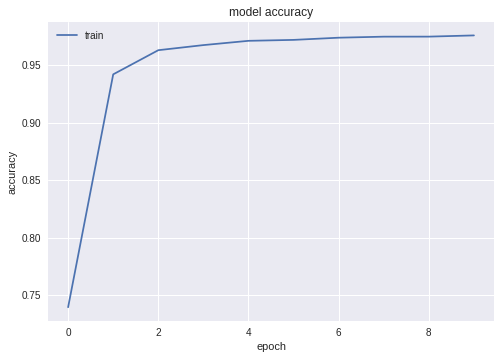

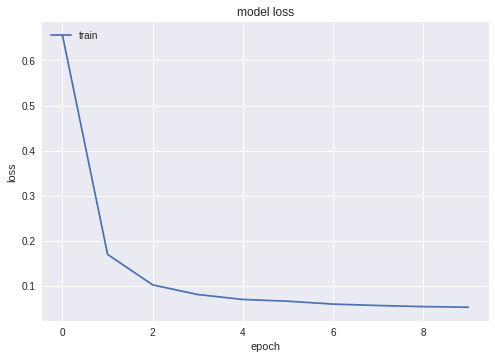

In [26]:
#Accuracy
plt.plot(kk.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#loss
plt.plot(kk.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()